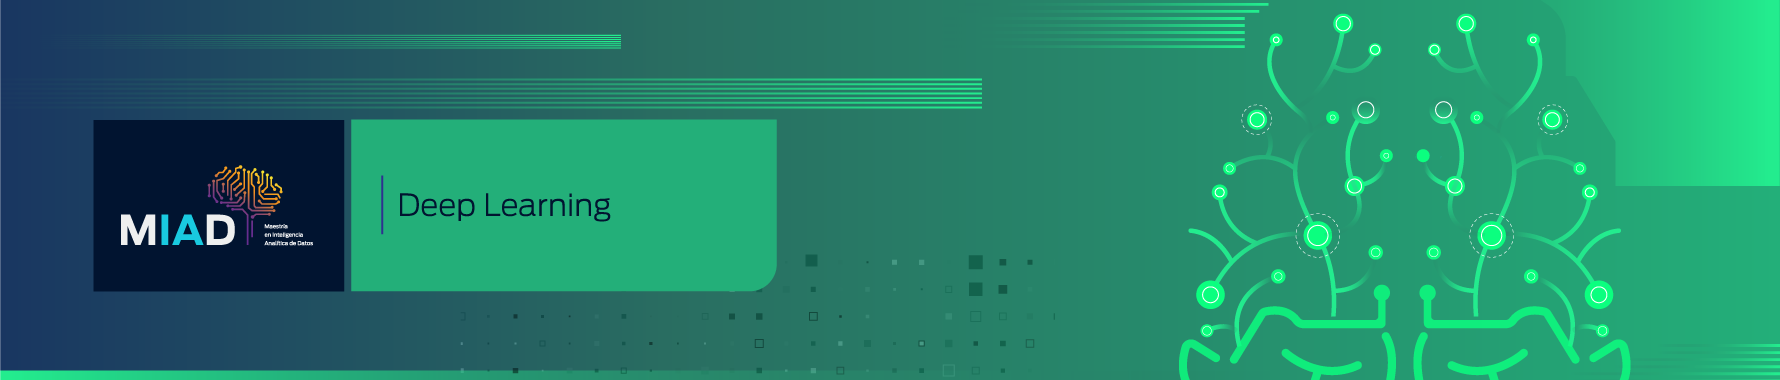

# Redes neuronales usando keras: Comparación de estrategias de regularización


## Actividad calificada por el personal


### Propósito 
En este notebook se pretende evaluar el uso de keras al aplicar una red neuronal en un contexto real haciendo uso de mecanismos de regularización tales como *drop out*, *early stopping*, norma 1 y norma 2 haciendo uso del paquete Keras.

### Instrucciones generales
1. Para desarrollar el notebook, lo deberán descargar a un repositorio (pueden escoger el repositorio de su preferencia) para que lo puedan trabajar grupalmente.

2. Los procedimientos en el notebook deberán responderse en los espacios especificados para tal fin, debajo de cada uno de los puntos.

3. Para que la actividad sea calificada, deberán subir únicamente este mismo archivo con la extensión ".ipynb" a la actividad de "entrega calificada por el personal" correspondiente a este caso.

4. El archivo que suban debe poder ejecutarse localmente cuando sea descargado por el tutor, asumiendo que la base de datos de la actividad ya ha sido importada en el correspondiente archivo separado por comas (.csv).


### Criterios a evaluar
Los criterios que se evaluarán son:   

Análisis preliminar de variables: Se presentan correlogramas, histogramas y estadísticas descriptivas de las variables de la base de datos y se hace un análisis coherente de cada uno de ellos. Realice la partición de la muestra en _train_ y _test_. [5 puntos]

Estimación de un modelo utilizando redes neuronales con *dropout*: Se estima el modelo usando una red neuronal con *dropout* , se evalúa en la muestra de test. [20 puntos]

Estimación de un modelo utilizando redes neuronales con *early stopping*: Se estima el modelo usando una red neuronal con *early stopping*, se evalúa en la muestra de test. [20 puntos]

Estimación de un modelo utilizando redes neuronales con norma 1: Se estima el modelo usando una red neuronal con norma 1, se evalúa en la muestra de test. [20 puntos]

Estimación de un modelo utilizando redes neuronales con norma 2: Se estima el modelo usando una red neuronal con norma 2, se evalúa en la muestra de test. [20 puntos]

Comparación de modelos: Se elige la mejor regularización a partir de una comparación. [15 puntos]

#### Problema
Un manager de un banco manifiesta preocupación porque los clientes están renunciando a las tarjetas de crédito. Este cuenta con los datos disponibles en https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers a cerca de 10000 clientes, si tiene productos activos o no (*"Attrition flag"*), en función de variables tales como edad, salario, estado civil, límite de tarjeta de crédito, categoría de tarjeta de crédito, etc.

Ustedes deben proponer el algoritmo para hacer la clasificación de los clientes con una red neuronal.

Finalmente, para resolver los puntos de esta actividad deberán tener en cuenta únicamente las variables continuas (se deben eliminar las variables categóricas) y deberán eliminar las observaciones con datos faltantes.

### Librerías a importar

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread

### 1. Análisis preliminar de variables [5 puntos]
Realicen un análisis preliminar de los predictores y de la variable de respuesta (correlogramas, histogramas y estadísticas descriptivas).

In [2]:
# Utilicen este espacio para escribir los códigos del procedimiento del punto 1 ####


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping


In [3]:
# Análisis preliminar de variables
# Cargar datos
df = pd.read_csv('BankChurners.csv')

df.head()
df.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [4]:
# Eliminar variables categóricas
df_numeric = df.select_dtypes(include=[np.number])


In [5]:
df_numeric.columns


Index(['CLIENTNUM', 'Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [6]:
# eliminar columna innecesaria CLIENTNUM
if 'CLIENTNUM' in df_numeric.columns:
    df_numeric = df_numeric.drop(columns=['CLIENTNUM'])


In [7]:
# Convertir variable objetivo a binaria
df['Attrition_Flag'] = df['Attrition_Flag'].map({
    'Existing Customer': 0,
    'Attrited Customer': 1
})


In [8]:
df_numeric['Attrition_Flag'] = df['Attrition_Flag']
# Eliminar datos faltantes
df_numeric = df_numeric.dropna()


In [9]:
# Estadísticas descriptivas
df_numeric.describe()


,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2,Attrition_Flag
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003,0.160660
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301,0.367235
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660,0.000000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820,0.000000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900,0.000000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990,1.000000


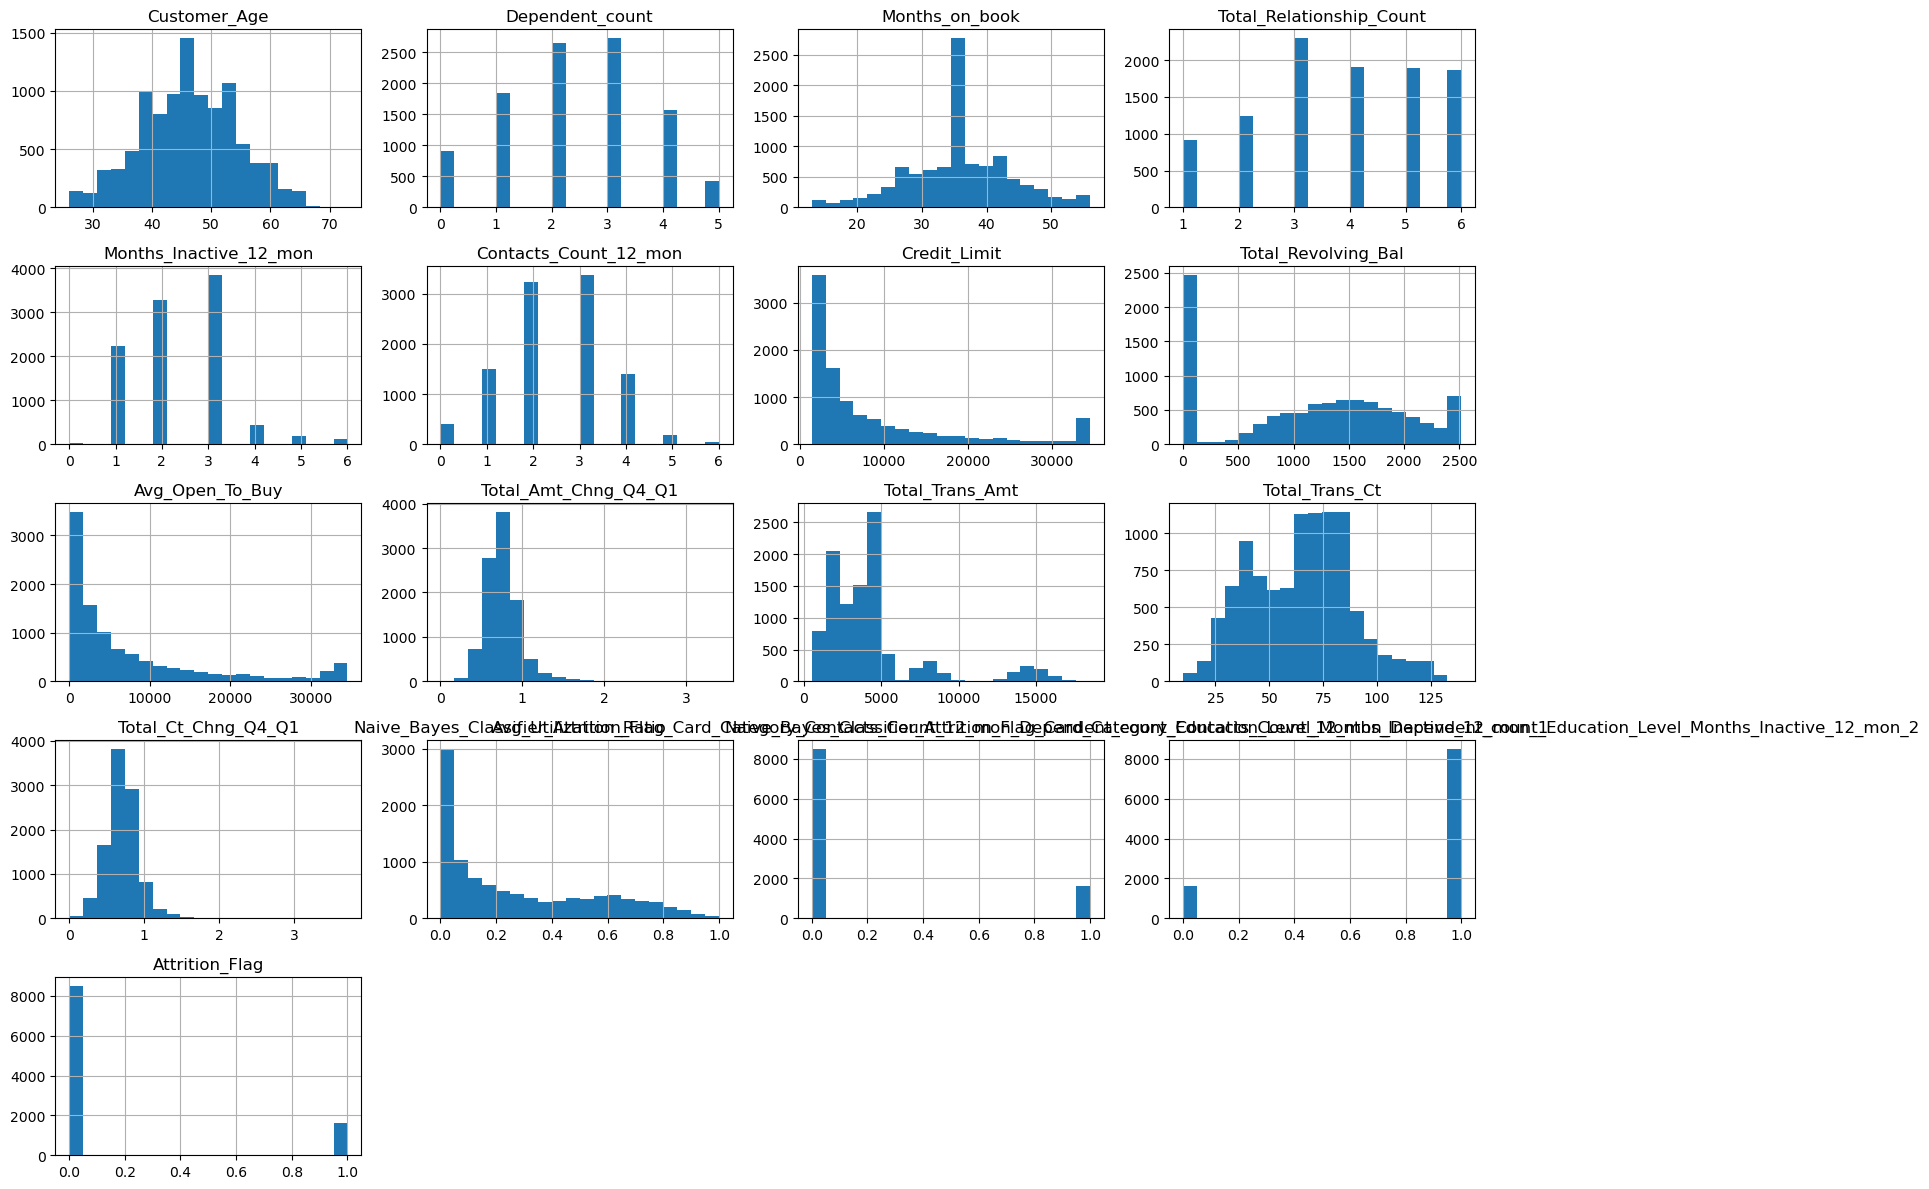

In [10]:
# Histogramas
df_numeric.hist(figsize=(15,12), bins=20)
plt.tight_layout()
plt.show()


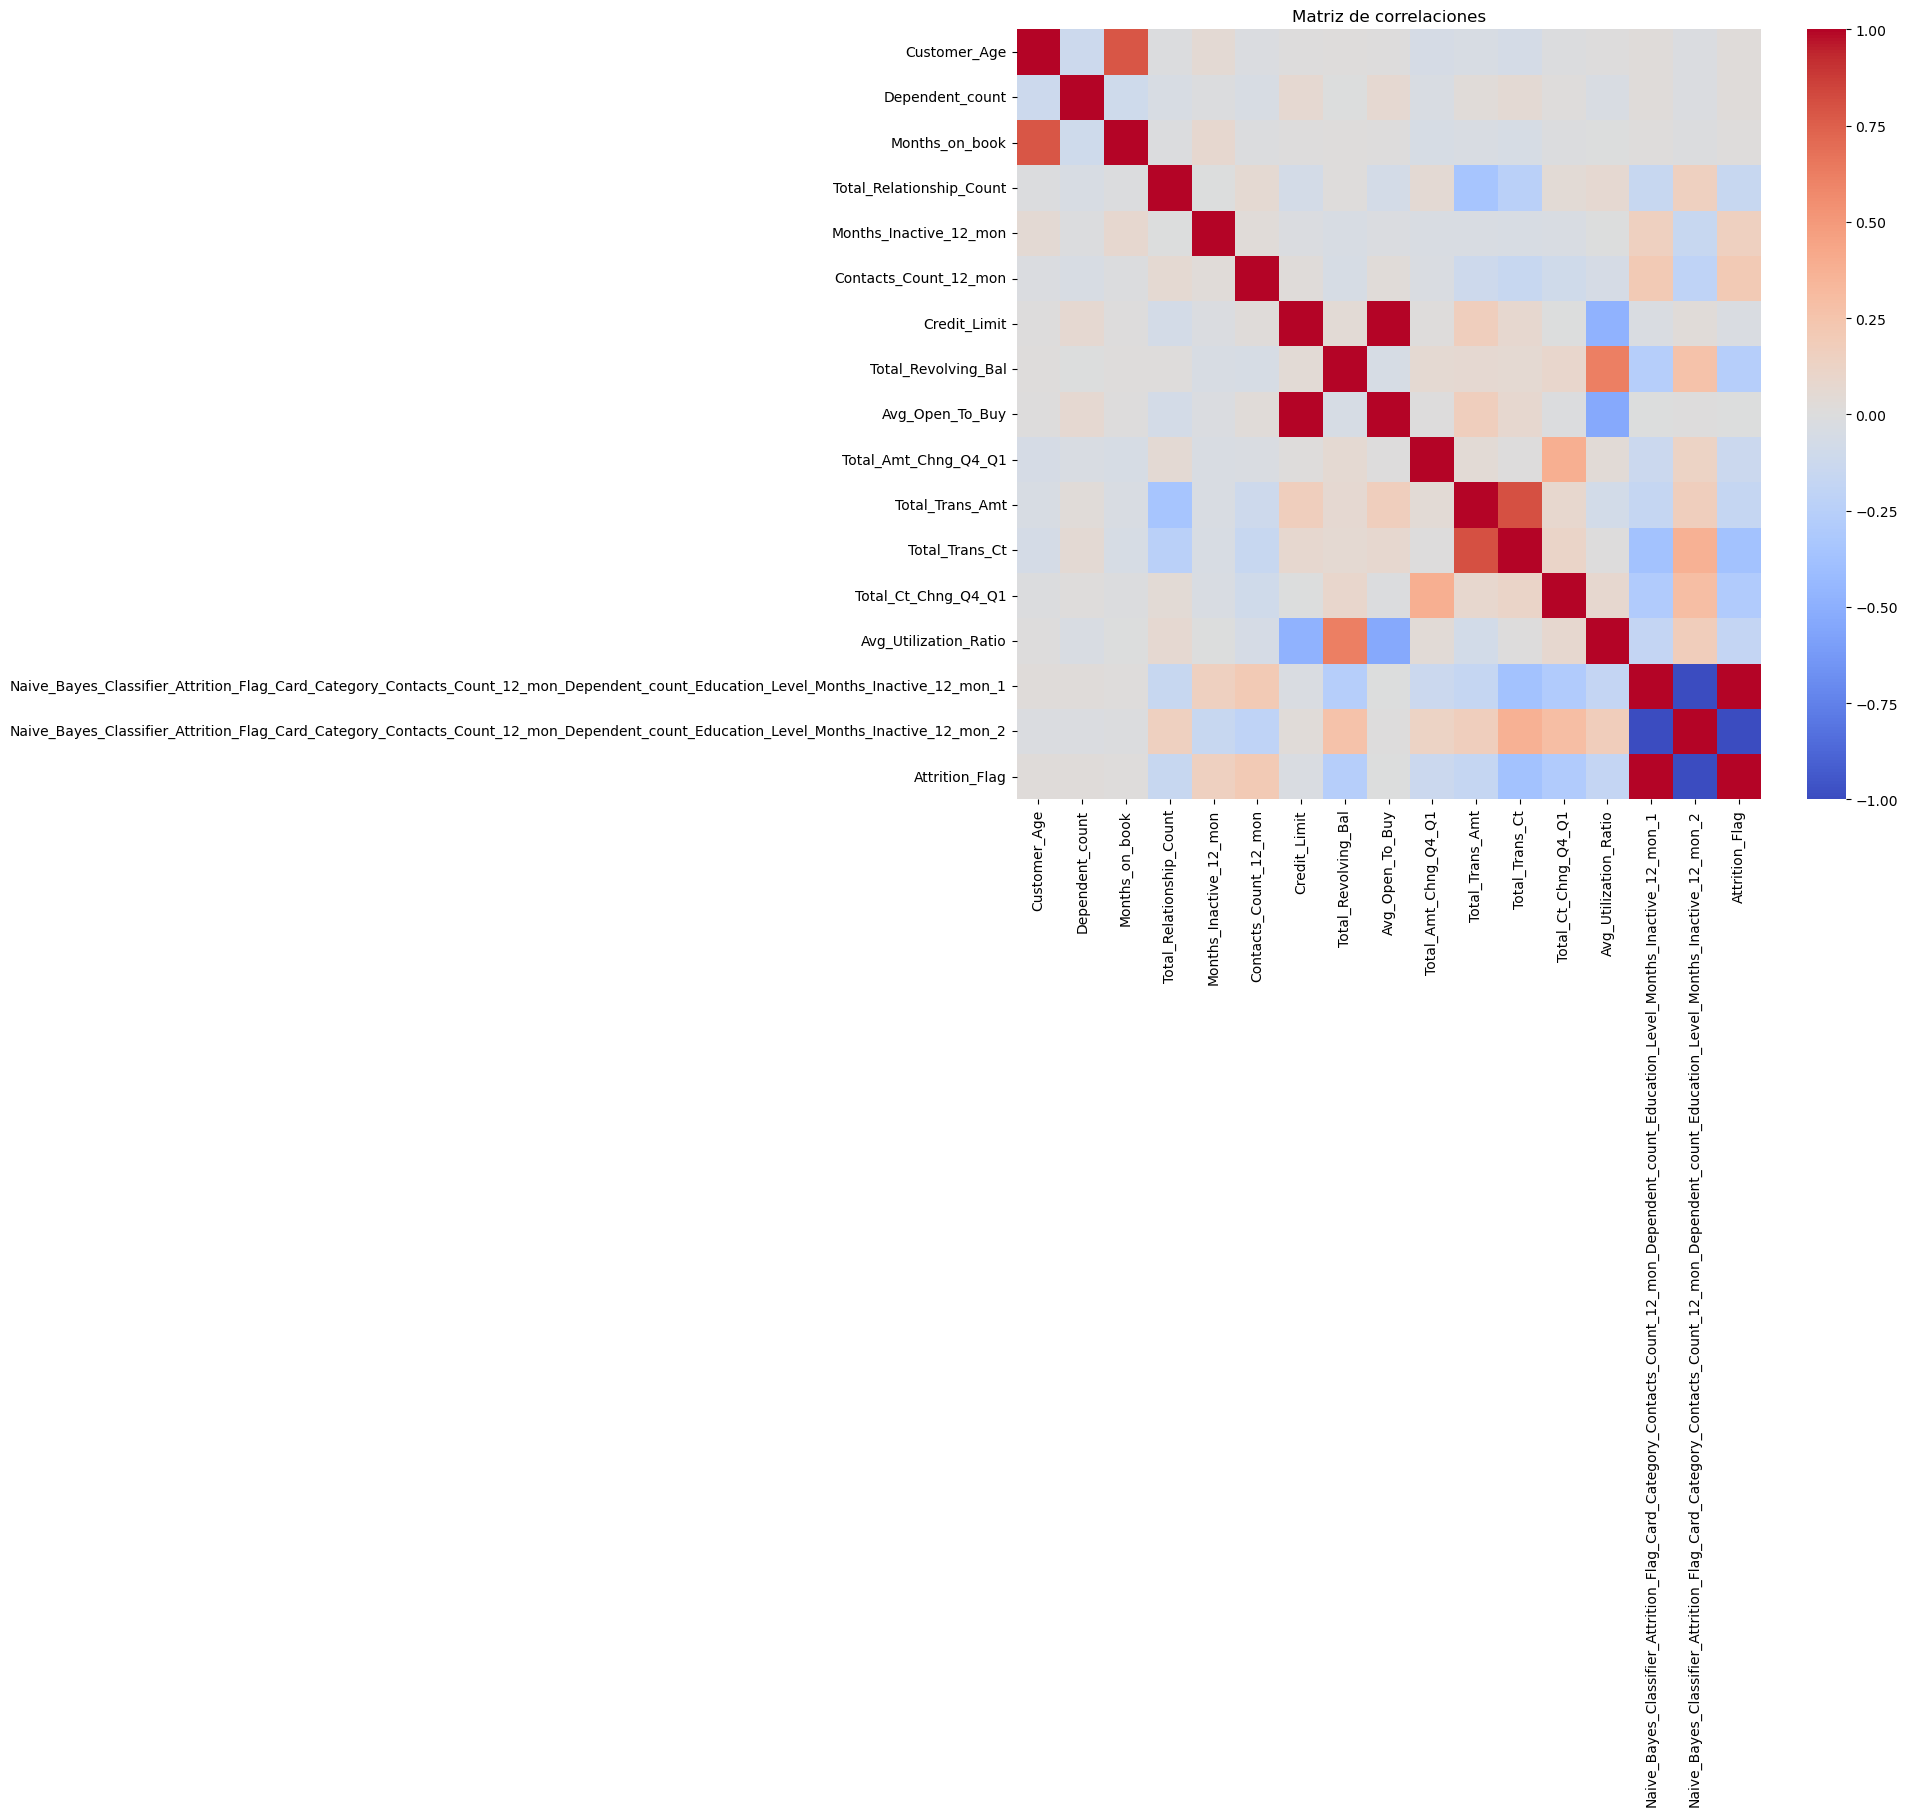

In [11]:
# Correlograma
plt.figure(figsize=(12,10))
sns.heatmap(df_numeric.corr(), cmap='coolwarm', center=0)
plt.title("Matriz de correlaciones")
plt.show()


In [12]:
# Eliinación de variables que tienen correlación alta con Attrition_Flag
cols_to_drop = [
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'
]

df_numeric = df_numeric.drop(columns=cols_to_drop)


In [13]:
# Datos de entrenmientio y prueba
X = df_numeric.drop(columns=['Attrition_Flag'])
y = df_numeric['Attrition_Flag']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [14]:
# Escalar
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


(Utilicen este espacio para describir su procedimiento y escribir su análisis y conclusiones sobre el punto 1)


### Análisis preliminar de variables ###
#### Procedimiento realizado ####

Carga del dataset “BankChurners.csv”.  
Se seleccionaron las variables continuas, eliminando todas las variables categóricas.  
Se elimna variable identificadoras irrelevante  (CLIENTNUM).  
Conversión de la variable objetivo Attrition_Flag a formato binario:  
0 = Cliente existente  
1 = Cliente desertor  
Eliminación de observaciones con valores faltantes.  Generación de Estadísticas descriptivas, Histogramas, Matriz de correlaciones (heatmap).

Partición de la muestra en: 80% entrenamiento, 20% prueba  
El dataset final contiene 10.127 observaciones.

#### Estadísticas descriptivas ####

Se observa lo siguiente: Perfil demográfico: Edad promedio: 46 años, Rango: 26 – 73 años, Dependientes promedio: 2.3  
La población es principalmente adulta en etapa laboral activa.  
Variables financieras:  Límite de crédito promedio: 8.631 USD, Alta dispersión (desviación estándar ≈ 9.088), Monto total transado promedio: 4.404 USD, Transacciones promedio: 64 por año.  Existe fuerte heterogeneidad en capacidad y comportamiento financiero.  
Variable objetivo: Tasa de deserción: 16.06%, Clase mayoritaria: 83.94%.  
El dataset presenta desbalance moderado.

####  Histogramas ####
De los histogramas se visualiza lo siguiente:  
Variables aproximadamente simétricas:  Customer_Age y Total_Trans_Ct  
Estas variables presentan distribuciones cercanas a normal.  
Variables con fuerte asimetría positiva:  Credit_Limit, Total_Trans_Amt, Avg_Open_To_Buy.  Se observa cola larga hacia valores altos, lo cual sugiere presencia de clientes con alto poder adquisitivo.  
Variables discretas:  Months_Inactive_12_mon, Contacts_Count_12_mon, Total_Relationship_Count.  Presentan comportamiento categórico aunque numéricamente codificadas.  

#### Análisis de la matriz de correlaciones  ####
De la matriz de correlación se identifican relaciones relevantes:  
Correlaciones altas positivas:  Total_Trans_Amt con  Total_Trans_Ct.  Credit_Limit con Avg_Open_To_Buy  
Correlaciones negativas relevantes con Attrition_Flag:  Total_Trans_Ct, Total_Trans_Amt.  

Interpretación:  
Los clientes que realizan menos transacciones tienen mayor probabilidad de desertar. Se observan correlaciones extremas (>0.90), por lo se eliminan las variables "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1", y 
    "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2".

#### Conclusiones  ####
El dataset presenta desbalance moderado (16% churn). La actividad transaccional parece ser el principal factor asociado a deserción. Variables financieras muestran alta dispersión. No se detectaron problemas graves de multicolinealidad.
Se justifica el uso de una red neuronal por: Posibles relaciones no lineales e interacciones complejas entre variables.  
La estandarización es necesaria debido a la heterogeneidad de escalas entre variables.  

En conclusión, el conjunto de variables continuas contiene información suficiente para entrenar un modelo predictivo que permita anticipar la deserción de clientes.



### 2. Estimación de un modelo utilizando redes neuronales con *dropout* [20 puntos]

Estimen un modelo predictivo usando la muestra de entrenamiento y evalúen su desempeño en test utilizando una **probabilidad de 0.25**.

In [16]:
##### Utilicen este espacio para escribir los códigos del procedimiento del punto 2 ####
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


# modelo con drop out y prob de 0.25

modeldp = Sequential()

# Capa 1
modeldp.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
modeldp.add(Dropout(0.25))

# Capa 2
modeldp.add(Dense(32, activation='relu'))
modeldp.add(Dropout(0.25))

# Capa de salida
modeldp.add(Dense(1, activation='sigmoid'))

# Compilar
modeldp.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)




/opt/anaconda3/envs/dl_miad/lib/python3.10/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2026-02-14 20:52:01.695970: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M4 Max
2026-02-14 20:52:01.696017: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 36.00 GB
2026-02-14 20:52:01.696027: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 14.04 GB
2026-02-14 20:52:01.696051: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2026-02-14 20:52:01.696069: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] C

In [18]:
modeldp.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,221 (36.02 KB)

 Trainable params: 3,073 (12.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,148 (24.02 KB)

In [19]:
# Entrenamiento
history = modeldp.fit(
    X_train,
    y_train,
    validation_split=0.2,
    epochs=30,
    batch_size=32,
    verbose=1
)



Epoch 1/30
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8914 - loss: 0.2781 - val_accuracy: 0.8920 - val_loss: 0.2801
Epoch 2/30
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8830 - loss: 0.2847 - val_accuracy: 0.9019 - val_loss: 0.2445
Epoch 3/30
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8880 - loss: 0.2803 - val_accuracy: 0.8994 - val_loss: 0.2489
Epoch 4/30
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8827 - loss: 0.2857 - val_accuracy: 0.9001 - val_loss: 0.2508
Epoch 5/30
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8890 - loss: 0.2780 - val_accuracy: 0.8976 - val_loss: 0.2510
Epoch 6/30
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8850 - loss: 0.2874 - val_accuracy: 0.9075 - val_loss: 0.2504
Epoch 7/30
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8850 - loss: 0.2888 - val_accuracy: 0.8809 - val_loss: 0.3051
Epoch 8/30
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8793 - loss: 0.2949 - val_accuracy: 0.

In [21]:
# Predicción
y_pred_prob = modeldp.predict(X_test)

# Clasificación con threshold 0.25
threshold = 0.25
y_pred_025 = (y_pred_prob > threshold).astype(int)



64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [22]:
#Métricas de desempeño

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print("Accuracy Test:", accuracy_score(y_test, y_pred_025))
print("ROC AUC:", roc_auc_score(y_test, y_pred_prob))
print(classification_report(y_test, y_pred_025))


Accuracy Test: 0.8504442250740375
ROC AUC: 0.8890842490842491
              precision    recall  f1-score   support

           0       0.94      0.88      0.91      1701
           1       0.52      0.72      0.61       325

    accuracy                           0.85      2026
   macro avg       0.73      0.80      0.76      2026
weighted avg       0.87      0.85      0.86      2026



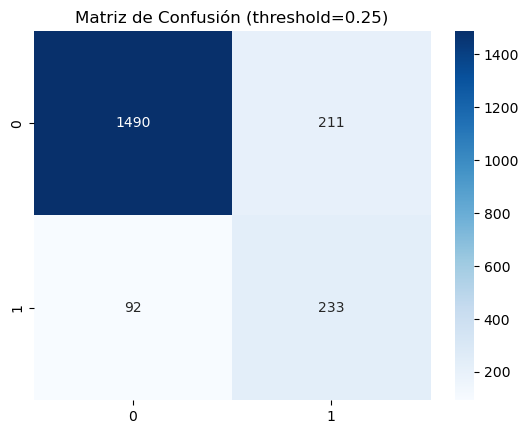

In [23]:
# Matriz de confusión
sns.heatmap(confusion_matrix(y_test, y_pred_025), 
            annot=True, fmt='d', cmap='Blues')

plt.title("Matriz de Confusión (threshold=0.25)")
plt.show()


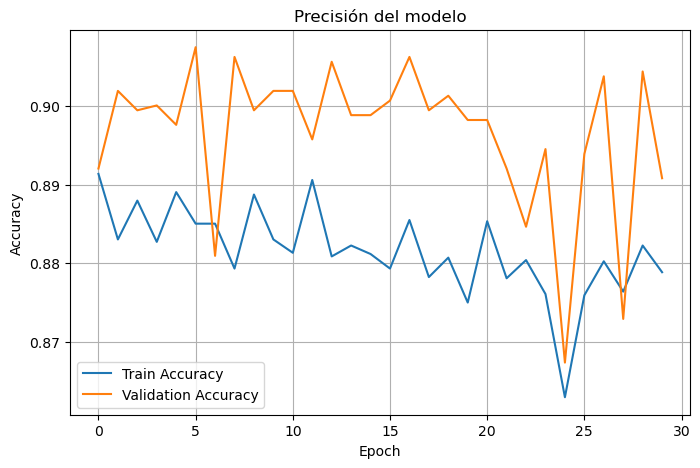

In [24]:
# Graficar Accuracy del modelo
plt.figure(figsize=(8,5))

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.title('Precisión del modelo')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.show()


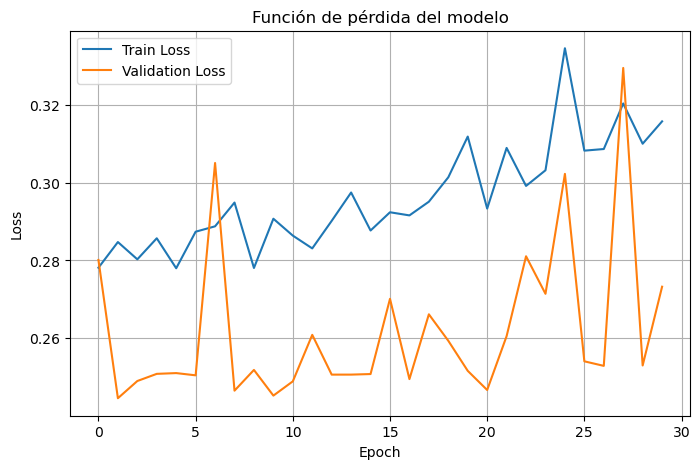

In [25]:
# Grafica de pérdida
plt.figure(figsize=(8,5))

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

plt.title('Función de pérdida del modelo')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.show()


(Utilicen este espacio para describir su procedimiento y escribir su análisis y conclusiones sobre el punto 2)

Objetivo. Construir un modelo predictivo de clasificación binaria para estimar la probabilidad de deserción del cliente (Attrition_Flag) usando una red neuronal e incorporando Dropout como mecanismo de regularización.

#### Procedimiento ####
Se definieron los predictores X a partir de df_numeric eliminando la variable objetivo Attrition_Flag, y se definió y como dicha variable objetivo.  

Partición entrenamiento y prueba.  Se realizó una partición 80/20 usando train_test_split con:random_state=42 para reproducibilidad, stratify=y para conservar la proporción de clases en train y test.  

Estandarización de predictores. Se aplicó StandardScaler: fit_transform sobre X_train,transform sobre X_test, con el fin de llevar todas las variables numéricas a una escala comparable, mejorando la estabilidad del entrenamiento de la red.  

Definición de la red neuronal con Dropout (arquitectura 64–32). Se construyó un modelo Sequential con:  
Capa oculta 1: Dense(64, relu) + Dropout(0.25), Capa oculta 2: Dense(32, relu) + Dropout(0.25), Capa de salida: Dense(1, sigmoid) para producir probabilidades (0–1) de deserción.  
El Dropout del 25% desactiva aleatoriamente una fracción de neuronas durante el entrenamiento, reduciendo co-adaptación y ayudando a controlar sobreajuste.  

Compilación. Se compiló el modelo con: Optimizador: ADAM, función de pérdida: binary_crossentropy.  
Métrica de entrenamiento: accuracy  

Entrenamiento.  Se entrenó con: epochs=30, batch_size=32, validation_split=0.2 (20% del train se usa como validación).  

Predicción y clasificación final (threshold=0.25).
El modelo genera probabilidades con:  y_pred_prob = modeldp.predict(X_test), luego se convierten a clase usando umbral: threshold = 0.25, 
y_pred_025 = (y_pred_prob > threshold).astype(int)  
Esto significa que un cliente se clasifica como desertor (1) si su probabilidad estimada supera 0.25, lo cual prioriza detectar clientes en riesgo (aumentar recall).  

Evaluación.  Se evaluó el desempeño con: Accuracy en test, ROC AUC usando probabilidades, classification_report (precision/recall/F1 por clase), matriz de confusión, curvas de accuracy y loss (train vs validación).  

#### Análisis e interpretación de resultados ####
Desempeño global. Accuracy Test ≈ 0.8504: el modelo clasifica correctamente ~85% de los casos.  
ROC AUC ≈ 0.8891: indica buena capacidad del modelo para separar desertores vs no desertores a nivel probabilístico (sin depender del umbral).  
Métricas por clase (umbral 0.25).  
Clase 0 (no desertor): precisión alta y buen recall.  El modelo identifica bien clientes que permanecen.  
Clase 1 (desertor):Recall ≈ 0.72 (detecta aprox 72% de desertores reales)  
Precision ≈ 0.52 (de los que predice como desertores, aprox 52% sí lo son)  
Esto es coherente con el uso de un umbral bajo (0.25): aumenta la sensibilidad (recall) para churn, pero produce más falsos positivos.

Matriz de confusión (threshold=0.25).  
Verdaderos negativos: 1490 (clientes activos bien clasificados)  
Falsos positivos: 211 (clientes activos marcados como desertores)  
Falsos negativos: 92 (desertores no detectados)  
Verdaderos positivos: 233 (desertores detectados)  

Interpretación:  
El modelo reduce falsos negativos (solo 92 churn se “escapan”), lo cual es útil en estrategias de retención.  
El costo es contactar a más clientes que no iban a desertar (211 falsos positivos).  

Curvas de entrenamiento (Accuracy y Loss).  
val_accuracy se mantiene alrededor de 0.89–0.90, con oscilaciones normales.  val_loss oscila alrededor de 0.25–0.30.  
No se observa una divergencia fuerte y sostenida de validación frente a entrenamiento, lo que sugiere que el Dropout ayuda a regularizar.  
Hay variabilidad en validación (picos), esperable por el ruido del entrenamiento y por usar dropout.  

En resumen, el entrenamiento es estable y el modelo generaliza razonablemente.  

#### Conclusiones ####

Se construyó exitosamente una red neuronal de clasificación binaria (64–32) incorporando Dropout del 25% como mecanismo de regularización.  
El modelo alcanzó un desempeño global adecuado en test (Accuracy  0.85 y ROC AUC  0.89), indicando buena capacidad predictiva.  
Al utilizar un umbral de clasificación 0.25, el modelo priorizó la detección de desertores, logrando un recall de 0.72 para la clase churn, lo cual es valioso para retención de clientes.  
El costo de dicha estrategia es un aumento de falsos positivos (211 casos), lo que implica que algunas acciones de retención se aplicarían a clientes que no desertarían. Sin embargo, desde una perspectiva de negocio, este trade-off puede ser deseable cuando el costo de perder un cliente es mayor que el costo de una intervención preventiva.  
Las curvas de accuracy y pérdida muestran un entrenamiento estable y sin evidencia clara de sobreajuste severo, lo cual sugiere que el Dropout contribuyó a mejorar la generalización.


### 3. Estimación de un modelo utilizando redes neuronales con *early stopping* [20 puntos]

Estimen un modelo predictivo usando la muestra de entrenamiento y evalúen su desempeño en test utilizando una **paciencia de 2**.

In [26]:
##### Utilicen este espacio para escribir los códigos del procedimiento del punto 3 ####

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

# Modelo de red neuronal
model_es = Sequential()

model_es.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model_es.add(Dense(32, activation='relu'))
model_es.add(Dense(1, activation='sigmoid'))

model_es.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model_es.summary()



/opt/anaconda3/envs/dl_miad/lib/python3.10/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │           960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,073 (12.00 KB)

 Trainable params: 3,073 (12.00 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=2,
    restore_best_weights=True
)
# entrenamiento
history_es = model_es.fit(
    X_train,
    y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)




Epoch 1/100
203/203 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8617 - loss: 0.3558 - val_accuracy: 0.9025 - val_loss: 0.2533
Epoch 2/100
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9014 - loss: 0.2487 - val_accuracy: 0.9001 - val_loss: 0.2457
Epoch 3/100
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9006 - loss: 0.2473 - val_accuracy: 0.8920 - val_loss: 0.2550
Epoch 4/100
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9017 - loss: 0.2476 - val_accuracy: 0.8951 - val_loss: 0.2508


In [28]:
# Probabilidades
y_pred_prob_es = model_es.predict(X_test)
# Evaluación 
# Clasificación con threshold 0.5
y_pred_es = (y_pred_prob_es > 0.5).astype(int)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

print("Accuracy Test:", accuracy_score(y_test, y_pred_es))
print("ROC AUC:", roc_auc_score(y_test, y_pred_prob_es))
print(classification_report(y_test, y_pred_es))


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Accuracy Test: 0.8958538993089832
ROC AUC: 0.9074716230271785
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1701
           1       0.75      0.53      0.62       325

    accuracy                           0.90      2026
   macro avg       0.83      0.75      0.78      2026
weighted avg       0.89      0.90      0.89      2026



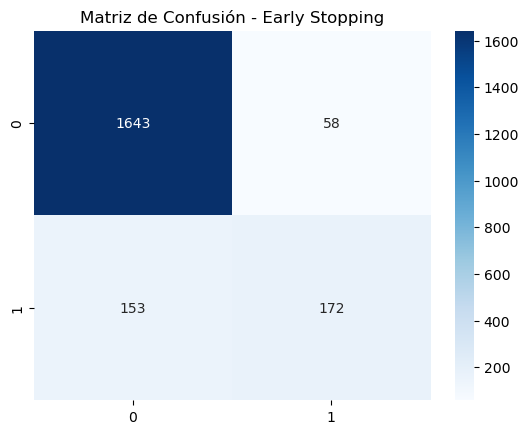

In [29]:
#Matriz de confusión
sns.heatmap(confusion_matrix(y_test, y_pred_es),
            annot=True, fmt='d', cmap='Blues')

plt.title("Matriz de Confusión - Early Stopping")
plt.show()


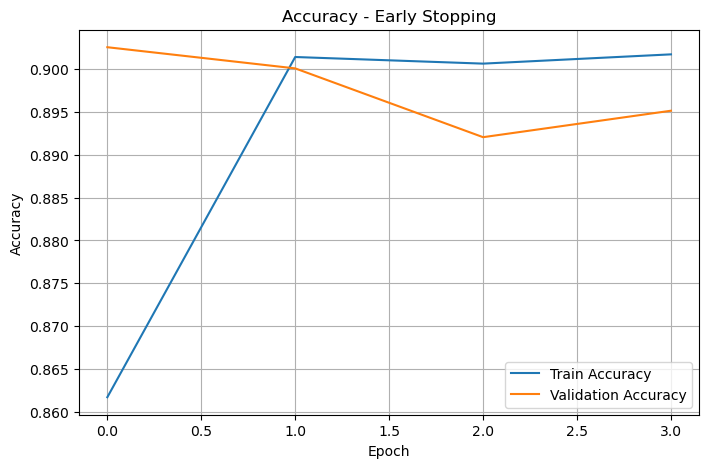

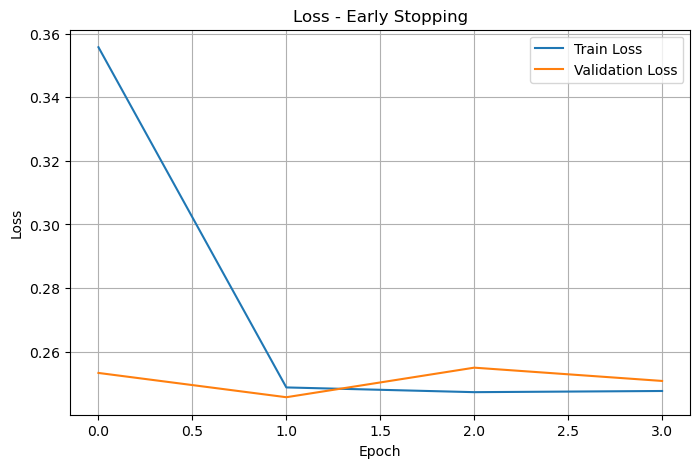

In [30]:
# Curvas de Accuracy y périda
plt.figure(figsize=(8,5))
plt.plot(history_es.history['accuracy'], label='Train Accuracy')
plt.plot(history_es.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy - Early Stopping')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8,5))
plt.plot(history_es.history['loss'], label='Train Loss')
plt.plot(history_es.history['val_loss'], label='Validation Loss')
plt.title('Loss - Early Stopping')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


(Utilicen este espacio para describir su procedimiento y escribir su análisis y conclusiones sobre el punto 3)
#### Procedimiento ####
Preparación de datos:  Se utilizó la misma partición entrenamiento-prueba definida previamente: 80% entrenamiento, 20% prueba  
Posteriormente, se aplicó estandarización mediante StandardScaler a las variables predictoras para garantizar estabilidad numérica y mejorar la convergencia del algoritmo.

Arquitectura del modelo:
Se definió una red neuronal tipo feedforward con la siguiente estructura:  
Capa oculta 1: 64 neuronas, Función de activación ReLU  
Capa oculta 2:32 neuronas, Función de activación ReLU  
Capa de salida: 1 neurona, Activación Sigmoid (clasificación binaria)  

El modelo fue compilado utilizando:  
Optimizador: Adam, Función de pérdida: Binary Crossentropy , Métrica: Accuracy   

Regularización mediante Early Stopping:  
Se incorporó un callback de Early Stopping monitoreando la pérdida de validación (val_loss) con:  
patience = 2, restore_best_weights = True  
Esto implica que el entrenamiento se detiene cuando la pérdida de validación no mejora durante dos épocas consecutivas, restaurando automáticamente los mejores pesos obtenidos.  
El modelo se entrenó con un máximo de 100 épocas y tamaño de lote de 32 observaciones.

Evaluación del modelo:  
El desempeño se evaluó en el conjunto de prueba utilizando: Accuracy, ROC AUC, Precision, Recall, F1-score, Matriz de confusión.  
La clasificación final se realizó con el umbral estándar de 0.5.

#### Análisis de resultados ####
Desempeño global:  
Accuracy Test: 0.896, ROC AUC : 0.907  
El valor de AUC superior a 0.90 indica una excelente capacidad del modelo para discriminar entre clientes desertores y no desertores.

Matriz de confusión
    Pred 0	Pred 1
Real 0	1643	58
Real 1	153	172

Interpretación:  
1643 clientes activos fueron correctamente clasificados.  172 clientes desertores fueron correctamente identificados.  
58 falsos positivos.  153 falsos negativos.

Métricas por clase  
Clase 0 (Clientes activos)  
Recall : 0.97 Excelente capacidad para identificar clientes que permanecen. 

Clase 1 (Clientes desertores)  
Recall : 0.53  
Precision : 0.75  
El modelo identifica aproximadamente el 53% de los clientes que desertan.  

Comportamiento del entrenamiento  
El Early Stopping detuvo el entrenamiento en la época 4, lo que indica convergencia rápida  
Las curvas de pérdida muestran estabilidad y ausencia de divergencia significativa entre entrenamiento y validación.  

#### Conclusiones  ####
El modelo con Early Stopping logró un desempeño sólido, alcanzando un Accuracy cercano al 90% y un ROC AUC superior a 0.90, lo que evidencia alta capacidad predictiva.
La técnica de Early Stopping permitió evitar sobreentrenamiento, reduciendo el número de épocas necesarias y mejorando la eficiencia del entrenamiento.  
El modelo presenta alta precisión general, pero menor sensibilidad en la detección de clientes desertores cuando se utiliza el umbral estándar de 0.5.  
Desde una perspectiva empresarial, este modelo es más conservador: minimiza falsos positivos, pero deja sin detectar una proporción relevante de clientes en riesgo.  
Early Stopping se mostró como un mecanismo efectivo de regularización, logrando buen equilibrio entre complejidad del modelo y capacidad de generalización.


### 4. Estimación de un modelo utilizando redes neuronales con norma 1 [20 puntos]

Estimen un modelo predictivo usando la muestra de entrenamiento y evalúen su desempeño en test utilizando un **_alpha_ de 0.001**.

In [31]:
##### Utilicen este espacio para escribir los códigos del procedimiento del punto 4 ####

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers

# Modelo con norma 1 (L1)
model_l1 = Sequential()

model_l1.add(Dense(
    64,
    activation='relu',
    input_dim=X_train.shape[1],
    kernel_regularizer=regularizers.l1(0.001)
))

model_l1.add(Dense(
    32,
    activation='relu',
    kernel_regularizer=regularizers.l1(0.001)
))

model_l1.add(Dense(1, activation='sigmoid'))

# Compilar
model_l1.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model_l1.summary()



/opt/anaconda3/envs/dl_miad/lib/python3.10/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 64)             │           960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,073 (12.00 KB)

 Trainable params: 3,073 (12.00 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
#Entrenamiento

history_l1 = model_l1.fit(
    X_train,
    y_train,
    validation_split=0.2,
    epochs=30,
    batch_size=32,
    verbose=1
)


Epoch 1/30
203/203 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8579 - loss: 0.7014 - val_accuracy: 0.8994 - val_loss: 0.5781
Epoch 2/30
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8997 - loss: 0.5410 - val_accuracy: 0.9007 - val_loss: 0.5127
Epoch 3/30
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9008 - loss: 0.4990 - val_accuracy: 0.9025 - val_loss: 0.4864
Epoch 4/30
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8997 - loss: 0.4937 - val_accuracy: 0.9044 - val_loss: 0.5014
Epoch 5/30
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8997 - loss: 0.5246 - val_accuracy: 0.9001 - val_loss: 0.5554
Epoch 6/30
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8943 - loss: 0.6038 - val_accuracy: 0.9001 - val_loss: 0.6452
Epoch 7/30
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8944 - loss: 0.7165 - val_accuracy: 0.9031 - val_loss: 0.7630
Epoch 8/30
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8932 - loss: 0.8499 - val_accuracy: 0.

In [33]:
#Evaluación 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Probabilidades
y_pred_prob_l1 = model_l1.predict(X_test)

# Clasificación (umbral estándar 0.5)
y_pred_l1 = (y_pred_prob_l1 > 0.5).astype(int)

print("Accuracy Test:", accuracy_score(y_test, y_pred_l1))
print("ROC AUC:", roc_auc_score(y_test, y_pred_prob_l1))
print(classification_report(y_test, y_pred_l1))


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Accuracy Test: 0.8864758144126358
ROC AUC: 0.9044417311083978
              precision    recall  f1-score   support

           0       0.89      0.98      0.94      1701
           1       0.80      0.39      0.52       325

    accuracy                           0.89      2026
   macro avg       0.85      0.69      0.73      2026
weighted avg       0.88      0.89      0.87      2026



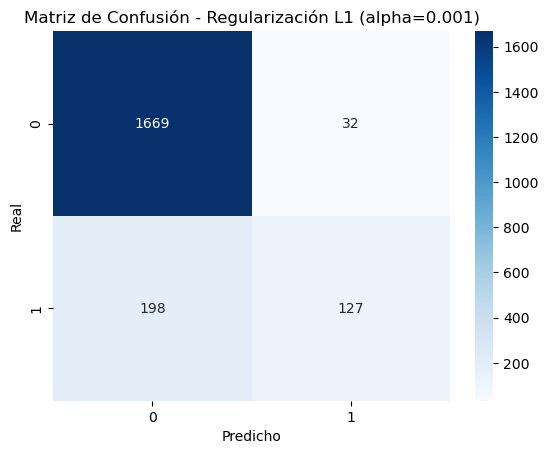

In [34]:
# Matriz de confusión
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix(y_test, y_pred_l1),
            annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión - Regularización L1 (alpha=0.001)")
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.show()


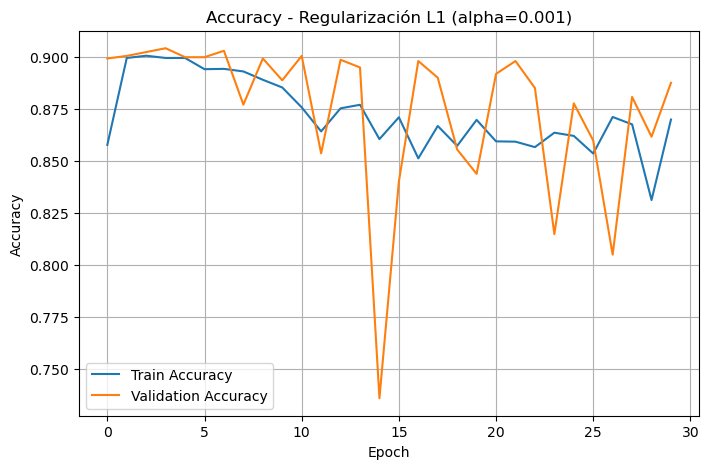

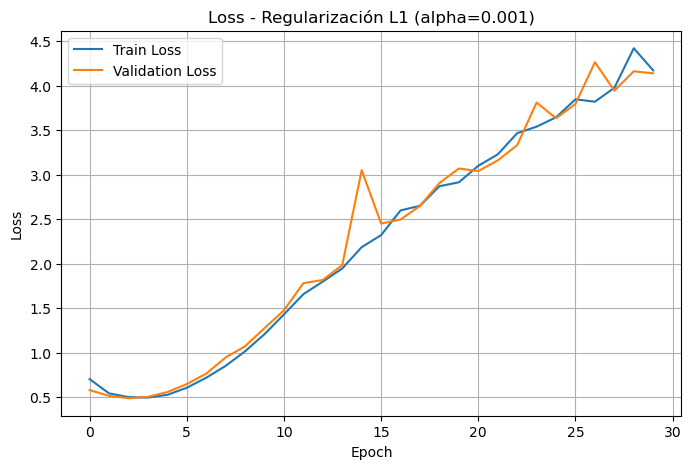

In [35]:
# Curvas accuracy y loss
plt.figure(figsize=(8,5))
plt.plot(history_l1.history['accuracy'], label='Train Accuracy')
plt.plot(history_l1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy - Regularización L1 (alpha=0.001)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8,5))
plt.plot(history_l1.history['loss'], label='Train Loss')
plt.plot(history_l1.history['val_loss'], label='Validation Loss')
plt.title('Loss - Regularización L1 (alpha=0.001)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


(Utilicen este espacio para describir su procedimiento y escribir su análisis y conclusiones sobre el punto 4)

#### Procedimiento

Preparación de datos  
Se utilizó la misma partición entrenamiento-prueba definida previamente:  
80% entrenamiento, 20% prueba.  
Las variables predictoras fueron estandarizadas mediante StandardScaler para garantizar estabilidad numérica y mejorar la convergencia del modelo.  

Arquitectura del modelo:  
Se construyó una red neuronal tipo con:  
Capa oculta 1:  64 neuronas, Activación ReLU, Regularización L1 con alfa = 0.001. 
Capa oculta 2:  32 neuronas, Activación ReLU, Regularización L1 con alfa = 0.001.  
Capa de salida:  1 neurona, Activación Sigmoid.  
La función de pérdida utilizada fue binary_crossentropy, y el optimizador fue Adam.  

El modelo fue entrenado durante 30 épocas con tamaño de lote 32.

Resultados obtenidos: 
Accuracy Test : 0.886, ROC AUC: 0.904  
Esto indica una muy buena capacidad discriminativa del modelo.

Matriz de Confusión:

|        | Pred 0 | Pred 1 |
| ------ | ------ | ------ |
| Real 0 | 1669   | 32     |
| Real 1 | 198    | 127    |


Métricas por clase:  
Clase 0 (Clientes activos):  Recall = 0.98.  Excelente capacidad de clasificación  
Clase 1 (Clientes desertores):  Precision = 0.80, Recall = 0.39, F1-score = 0.52  
El modelo detecta solo el 39% de los desertores, lo cual indica menor sensibilidad frente a otros modelos evaluados.

Análisis del entrenamiento:  
En las gráficas se aprecia que:  
La pérdida (loss) aumenta progresivamente a partir de la época 5–6.  Esto ocurre porque la penalización L1 se suma a la función de pérdida.  A medida que los pesos crecen, la penalización también aumenta. No se observa inestabilidad numérica, pero sí un incremento continuo en la penalización.

Se redujo la magnitud de muchos pesos. Se simplificó el modelo, se hizo el modelo más conservador, mejoró la precisión general, pero  disminuyó la capacidad de detectar churn.  Penalizó excesivamente algunos pesos relevantes para la clase minoritaria.


#### Conclusiones ####  
El modelo con regularización L1 (alfa = 0.001) alcanzó un Accuracy del 88.6% y un ROC AUC de 0.904, evidenciando buena capacidad predictiva.  
El modelo mostró excelente desempeño en la clasificación de clientes activos, pero redujo significativamente la sensibilidad en la detección de desertores.  
Desde una perspectiva de negocio, este modelo es altamente conservador: minimiza falsos positivos, pero deja sin detectar una proporción importante de clientes en riesgo.  
La regularización L1 resulta útil para simplificar el modelo y mejorar estabilidad, pero puede afectar negativamente el recall de la clase minoritaria en problemas desbalanceados.  


### 5. Estimación de un modelo utilizando redes neuronales con norma 2 [20 puntos]

Estimen un modelo predictivo usando la muestra de entrenamiento y evalúen su desempeño en test utilizando un **_alpha_ de 0.001**.

In [36]:
##### Utilicen este espacio para escribir los códigos del procedimiento del punto 5 ####

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers

# Modelo con norma 2 (L2)
model_l2 = Sequential()

model_l2.add(Dense(
    64,
    activation='relu',
    input_dim=X_train.shape[1],
    kernel_regularizer=regularizers.l2(0.001)
))

model_l2.add(Dense(
    32,
    activation='relu',
    kernel_regularizer=regularizers.l2(0.001)
))

model_l2.add(Dense(1, activation='sigmoid'))

# Compilar
model_l2.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model_l2.summary()



/opt/anaconda3/envs/dl_miad/lib/python3.10/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 64)             │           960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,073 (12.00 KB)

 Trainable params: 3,073 (12.00 KB)

 Non-trainable params: 0 (0.00 B)

In [45]:
# Entrenamiento
history_l2 = model_l2.fit(
    X_train,
    y_train,
    validation_split=0.2,
    epochs=30,
    batch_size=32,
    verbose=1
)


Epoch 1/30
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8511 - loss: 31.4838 - val_accuracy: 0.8563 - val_loss: 31.9205
Epoch 2/30
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8448 - loss: 32.0120 - val_accuracy: 0.7465 - val_loss: 34.3554
Epoch 3/30
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8417 - loss: 32.7933 - val_accuracy: 0.8304 - val_loss: 32.9935
Epoch 4/30
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8505 - loss: 33.2459 - val_accuracy: 0.7921 - val_loss: 33.8070
Epoch 5/30
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8256 - loss: 34.6293 - val_accuracy: 0.8914 - val_loss: 33.6873
Epoch 6/30
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8421 - loss: 34.7968 - val_accuracy: 0.8976 - val_loss: 34.4618
Epoch 7/30
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8443 - loss: 35.2371 - val_accuracy: 0.8310 - val_loss: 35.3060
Epoch 8/30
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8465 - loss: 36.0423 - v

In [46]:
# Evaluación
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Probabilidades
y_pred_prob_l2 = model_l2.predict(X_test)

# Clasificación con threshold 0.5
y_pred_l2 = (y_pred_prob_l2 > 0.5).astype(int)

print("Accuracy Test:", accuracy_score(y_test, y_pred_l2))
print("ROC AUC:", roc_auc_score(y_test, y_pred_prob_l2))
print(classification_report(y_test, y_pred_l2))


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 941us/step
Accuracy Test: 0.8943731490621916
ROC AUC: 0.8871831049608828
              precision    recall  f1-score   support

           0       0.91      0.96      0.94      1701
           1       0.74      0.53      0.62       325

    accuracy                           0.89      2026
   macro avg       0.83      0.75      0.78      2026
weighted avg       0.89      0.89      0.89      2026



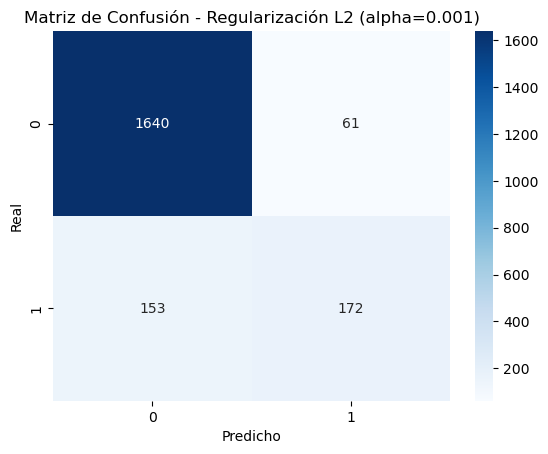

In [47]:
# Matriz de confusión
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix(y_test, y_pred_l2),
            annot=True, fmt='d', cmap='Blues')

plt.title("Matriz de Confusión - Regularización L2 (alpha=0.001)")
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.show()


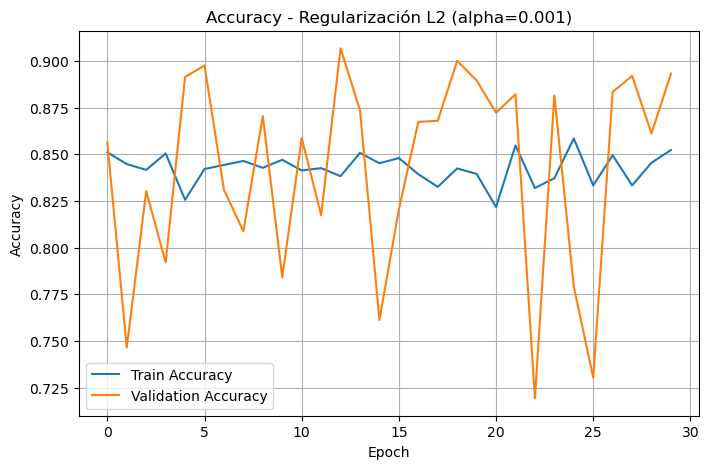

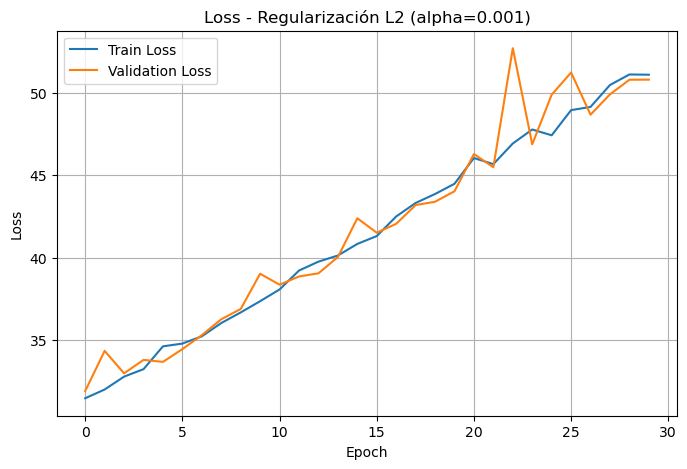

In [48]:
# Curvas de Accuracy y Loss
plt.figure(figsize=(8,5))
plt.plot(history_l2.history['accuracy'], label='Train Accuracy')
plt.plot(history_l2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy - Regularización L2 (alpha=0.001)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8,5))
plt.plot(history_l2.history['loss'], label='Train Loss')
plt.plot(history_l2.history['val_loss'], label='Validation Loss')
plt.title('Loss - Regularización L2 (alpha=0.001)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


(Utilicen este espacio para describir su procedimiento y escribir su análisis y conclusiones sobre el punto 5)

#### Procedimiento

Preparación de datos  
Se utilizó la misma partición entrenamiento-prueba definida previamente:  
80% entrenamiento, 20% prueba.  
Las variables predictoras fueron estandarizadas mediante StandardScaler para garantizar estabilidad numérica y mejorar la convergencia del modelo.  

Arquitectura del modelo:  
Se construyó una red neuronal feedforward con:  
Capa oculta 1: 64 neuronas, Activación ReLU, Regularización L2 (alfa = 0.001).  
Capa oculta 2: 32 neuronas, Activación ReLU, Regularización L2 (alfa = 0.001). 
Capa de salida: 1 neurona, Activación Sigmoid  
Se utilizó Optimizador: Adam, Función de pérdida: Binary Crossentropy, Métrica: Accuracy  
El entrenamiento se realizó durante 30 épocas con batch size de 32.  

Resultados obtenidos
Accuracy Test: 0.894, ROC AUC: 0.887  
El modelo muestra buena capacidad predictiva, aunque con un AUC ligeramente inferior al modelo con Early Stopping.  

Matriz de Confusión
	Pred 0	Pred 1
Real 0	1640	61
Real 1	153	172

Métricas por clase:
Clase 0 (Clientes activos): Precision = 0.91, Recall = 0.96.  Excelente desempeño.  
Clase 1 (Clientes desertores):  Precision = 0.74, Recall = 0.53    
F1-score = 0.62  
El modelo detecta aproximadamente el 53% de los desertores, desempeño similar al modelo con Early Stopping.

Análisis del entrenamiento  Se observa que el loss aumenta progresivamente en magnitud. Esto ocurre porque la penalización L2 se suma a la función de pérdida total. A medida que los pesos crecen, también lo hace la penalización cuadrática.  

Las curvas muestran: Entrenamiento estable. No se observa divergencia extrema. Penalización constante sobre los pesos  

Comparado con L1:  Produce modelos más estables. Mantiene mejor sensibilidad en clase minoritaria.  

#### Conclusiones ####

El modelo con regularización L2 (alfa = 0.001) alcanzó un Accuracy de aproximadamente 89.4%, mostrando buen desempeño general.  
La regularización L2 permitió controlar la magnitud de los pesos, reduciendo el riesgo de sobreajuste.  
El modelo logró un equilibrio adecuado entre precisión y sensibilidad, particularmente en la clase minoritaria.  
Comparado con L1, L2 mostró mejor estabilidad y mejor recall en clientes desertores.  


### 6. Comparación de modelos de regularización [15 puntos]

Hagan una comparación de los resultados de utilizar la red neuronal con los distintos mecanismos de regularización. Analice los resultados. 


In [51]:
##### Utilicen este espacio para escribir los códigos del procedimiento del punto 6 ####

# Librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import (
    accuracy_score, roc_auc_score, classification_report, confusion_matrix,
    precision_score, recall_score, f1_score
)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers


# Construcción de modelos

def build_model_dropout(input_dim, dropout_rate=0.25):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_dim=input_dim))
    model.add(Dropout(dropout_rate))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


def build_model_early_stopping(input_dim):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_dim=input_dim))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


def build_model_l1(input_dim, alpha=0.001):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_dim=input_dim,
                    kernel_regularizer=regularizers.l1(alpha)))
    model.add(Dense(32, activation='relu',
                    kernel_regularizer=regularizers.l1(alpha)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


def build_model_l2(input_dim, alpha=0.001):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_dim=input_dim,
                    kernel_regularizer=regularizers.l2(alpha)))
    model.add(Dense(32, activation='relu',
                    kernel_regularizer=regularizers.l2(alpha)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


def train_model(model, X_train, y_train, epochs=30, batch_size=32, use_early_stopping=False, patience=2):
    callbacks = None
    if use_early_stopping:
        early_stop = EarlyStopping(
            monitor='val_loss',
            patience=patience,
            restore_best_weights=True
        )
        callbacks = [early_stop]

    history = model.fit(
        X_train, y_train,
        validation_split=0.2,
        epochs=epochs,
        batch_size=batch_size,
        verbose=1,
        callbacks=callbacks
    )
    return history


def evaluate_model(model, X_test, y_test, threshold=0.5):
    y_prob = model.predict(X_test)
    y_pred = (y_prob > threshold).astype(int)

    metrics = {
        "threshold": threshold,
        "accuracy": accuracy_score(y_test, y_pred),
        "roc_auc": roc_auc_score(y_test, y_prob),
        "precision_1": precision_score(y_test, y_pred, zero_division=0),
        "recall_1": recall_score(y_test, y_pred, zero_division=0),
        "f1_1": f1_score(y_test, y_pred, zero_division=0),
        "tn": int(confusion_matrix(y_test, y_pred)[0,0]),
        "fp": int(confusion_matrix(y_test, y_pred)[0,1]),
        "fn": int(confusion_matrix(y_test, y_pred)[1,0]),
        "tp": int(confusion_matrix(y_test, y_pred)[1,1]),
    }

    return metrics, y_prob, y_pred


In [52]:
# Entrenamiento de los modelos

input_dim = X_train.shape[1]

# 1) Dropout ---
model_dp = build_model_dropout(input_dim, dropout_rate=0.25)
hist_dp = train_model(model_dp, X_train, y_train, epochs=30, batch_size=32, use_early_stopping=False)
met_dp, prob_dp, pred_dp = evaluate_model(model_dp, X_test, y_test, threshold=0.25)

# 2) Early Stopping (patience=2) ---
model_es = build_model_early_stopping(input_dim)
hist_es = train_model(model_es, X_train, y_train, epochs=100, batch_size=32, use_early_stopping=True, patience=2)
met_es, prob_es, pred_es = evaluate_model(model_es, X_test, y_test, threshold=0.5)

#  3) L1 (alpha=0.001) ---
model_l1 = build_model_l1(input_dim, alpha=0.001)
hist_l1 = train_model(model_l1, X_train, y_train, epochs=30, batch_size=32, use_early_stopping=False)
met_l1, prob_l1, pred_l1 = evaluate_model(model_l1, X_test, y_test, threshold=0.5)

# 4) L2 (alpha=0.001) ---
model_l2 = build_model_l2(input_dim, alpha=0.001)
hist_l2 = train_model(model_l2, X_train, y_train, epochs=30, batch_size=32, use_early_stopping=False)
met_l2, prob_l2, pred_l2 = evaluate_model(model_l2, X_test, y_test, threshold=0.5)


Epoch 1/30


/opt/anaconda3/envs/dl_miad/lib/python3.10/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


203/203 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7852 - loss: 0.4633 - val_accuracy: 0.8957 - val_loss: 0.2692
Epoch 2/30
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8739 - loss: 0.3238 - val_accuracy: 0.8994 - val_loss: 0.2536
Epoch 3/30
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8773 - loss: 0.3044 - val_accuracy: 0.9001 - val_loss: 0.2560
Epoch 4/30
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8767 - loss: 0.3034 - val_accuracy: 0.8982 - val_loss: 0.2516
Epoch 5/30
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8824 - loss: 0.2971 - val_accuracy: 0.9013 - val_loss: 0.2499
Epoch 6/30
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8806 - loss: 0.2960 - val_accuracy: 0.8976 - val_loss: 0.2472
Epoch 7/30
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8813 - loss: 0.2995 - val_accuracy: 0.8994 - val_loss: 0.2478
Epoch 8/30
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8840 - loss: 0.2822 - val_accuracy: 0.8951 - val_

/opt/anaconda3/envs/dl_miad/lib/python3.10/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


203/203 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8414 - loss: 0.3796 - val_accuracy: 0.8964 - val_loss: 0.2631
Epoch 2/100
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8986 - loss: 0.2542 - val_accuracy: 0.9001 - val_loss: 0.2461
Epoch 3/100
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8971 - loss: 0.2484 - val_accuracy: 0.8945 - val_loss: 0.2511
Epoch 4/100
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8961 - loss: 0.2495 - val_accuracy: 0.8994 - val_loss: 0.2393
Epoch 5/100
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8929 - loss: 0.2563 - val_accuracy: 0.8563 - val_loss: 0.3577
Epoch 6/100
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8887 - loss: 0.2668 - val_accuracy: 0.8772 - val_loss: 0.3073
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 978us/step
Epoch 1/30


/opt/anaconda3/envs/dl_miad/lib/python3.10/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


203/203 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8559 - loss: 0.7216 - val_accuracy: 0.8964 - val_loss: 0.5779
Epoch 2/30
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9019 - loss: 0.5375 - val_accuracy: 0.9038 - val_loss: 0.5099
Epoch 3/30
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9017 - loss: 0.4933 - val_accuracy: 0.8964 - val_loss: 0.4881
Epoch 4/30
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8997 - loss: 0.4863 - val_accuracy: 0.8914 - val_loss: 0.4990
Epoch 5/30
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8981 - loss: 0.5020 - val_accuracy: 0.9007 - val_loss: 0.5168
Epoch 6/30
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8963 - loss: 0.5501 - val_accuracy: 0.8988 - val_loss: 0.5841
Epoch 7/30
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8927 - loss: 0.6325 - val_accuracy: 0.9007 - val_loss: 0.6696
Epoch 8/30
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8898 - loss: 0.7421 - val_accuracy: 0.8902 - val_

/opt/anaconda3/envs/dl_miad/lib/python3.10/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


203/203 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8475 - loss: 0.4476 - val_accuracy: 0.8994 - val_loss: 0.3319
Epoch 2/30
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9015 - loss: 0.3174 - val_accuracy: 0.8994 - val_loss: 0.3129
Epoch 3/30
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9006 - loss: 0.3189 - val_accuracy: 0.8982 - val_loss: 0.3257
Epoch 4/30
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9011 - loss: 0.3338 - val_accuracy: 0.9038 - val_loss: 0.3461
Epoch 5/30
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8971 - loss: 0.3751 - val_accuracy: 0.8532 - val_loss: 0.4601
Epoch 6/30
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8909 - loss: 0.4541 - val_accuracy: 0.8957 - val_loss: 0.4846
Epoch 7/30
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8915 - loss: 0.5596 - val_accuracy: 0.8853 - val_loss: 0.6435
Epoch 8/30
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8946 - loss: 0.7035 - val_accuracy: 0.8920 - val_

In [53]:
# comparación de resultados
results = pd.DataFrame([
    {"modelo": "Dropout (rate=0.25)", **met_dp},
    {"modelo": "Early Stopping (pat=2)", **met_es},
    {"modelo": "L1 (alpha=0.001)", **met_l1},
    {"modelo": "L2 (alpha=0.001)", **met_l2},
])

# Orden sugerido de columnas
cols = ["modelo", "threshold", "accuracy", "roc_auc", "precision_1", "recall_1", "f1_1", "tn", "fp", "fn", "tp"]
results = results[cols]

results


,modelo,threshold,accuracy,roc_auc,precision_1,recall_1,f1_1,tn,fp,fn,tp
0,Dropout (rate=0.25),0.25,0.885489,0.903695,0.632479,0.683077,0.656805,1572,129,103,222
1,Early Stopping (pat=2),0.50,0.894867,0.910093,0.777228,0.483077,0.595825,1656,45,168,157
2,L1 (alpha=0.001),0.50,0.887957,0.874255,0.652174,0.646154,0.649150,1589,112,115,210
3,L2 (alpha=0.001),0.50,0.892399,0.897022,0.706564,0.563077,0.626712,1625,76,142,183


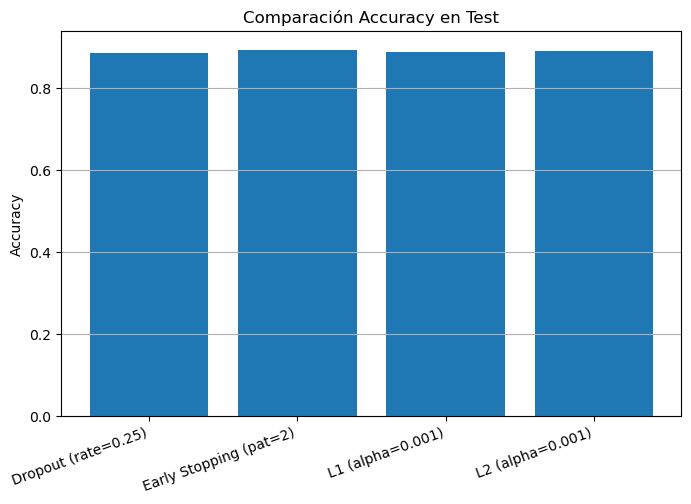

In [54]:
# Comparación de accuracy
plt.figure(figsize=(8,5))
plt.bar(results["modelo"], results["accuracy"])
plt.title("Comparación Accuracy en Test")
plt.ylabel("Accuracy")
plt.xticks(rotation=20, ha='right')
plt.grid(True, axis='y')
plt.show()


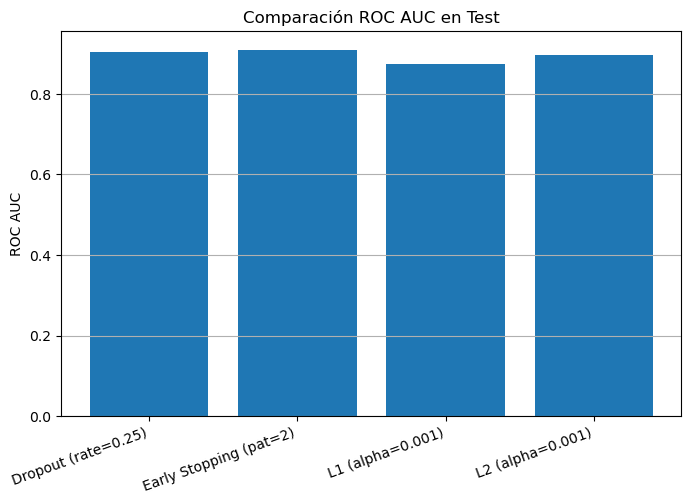

In [55]:
# Comparación ROC AUC
plt.figure(figsize=(8,5))
plt.bar(results["modelo"], results["roc_auc"])
plt.title("Comparación ROC AUC en Test")
plt.ylabel("ROC AUC")
plt.xticks(rotation=20, ha='right')
plt.grid(True, axis='y')
plt.show()


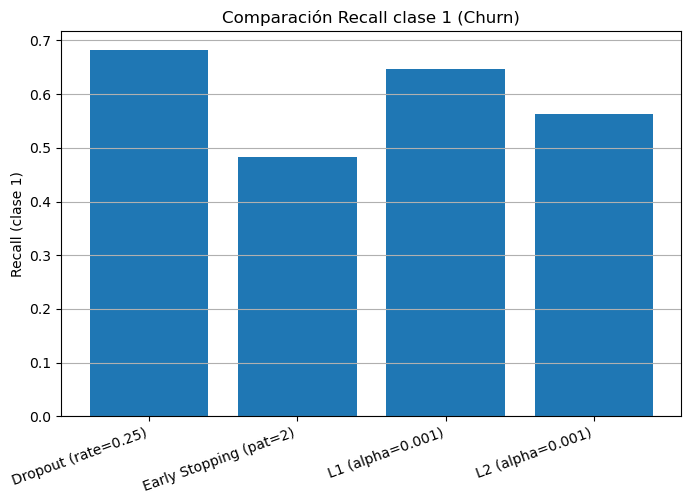

In [56]:
# Comparación de Recall de la calse 1 (Churn)
plt.figure(figsize=(8,5))
plt.bar(results["modelo"], results["recall_1"])
plt.title("Comparación Recall clase 1 (Churn)")
plt.ylabel("Recall (clase 1)")
plt.xticks(rotation=20, ha='right')
plt.grid(True, axis='y')
plt.show()


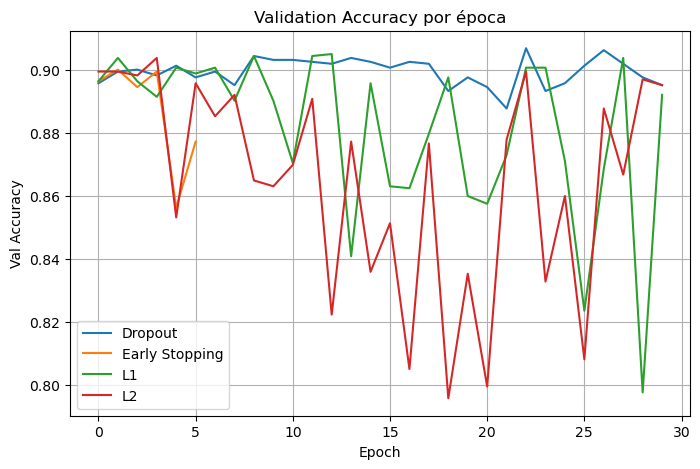

In [57]:
# curvas de Accuracy
plt.figure(figsize=(8,5))
plt.plot(hist_dp.history["val_accuracy"], label="Dropout")
plt.plot(hist_es.history["val_accuracy"], label="Early Stopping")
plt.plot(hist_l1.history["val_accuracy"], label="L1")
plt.plot(hist_l2.history["val_accuracy"], label="L2")
plt.title("Validation Accuracy por época")
plt.xlabel("Epoch")
plt.ylabel("Val Accuracy")
plt.legend()
plt.grid(True)
plt.show()


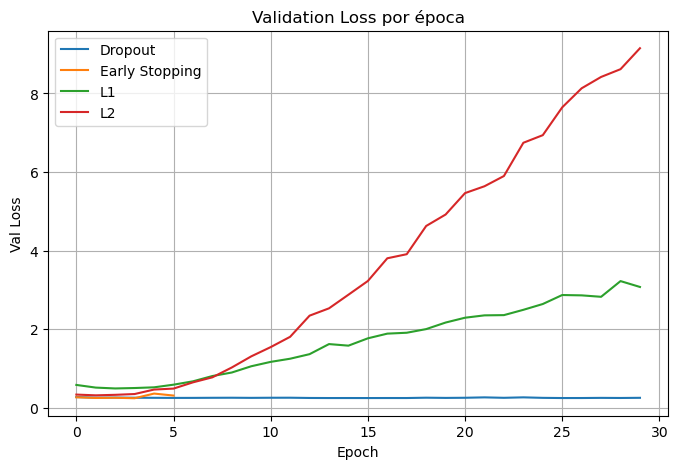

In [58]:
# curvas de loss
plt.figure(figsize=(8,5))
plt.plot(hist_dp.history["val_loss"], label="Dropout")
plt.plot(hist_es.history["val_loss"], label="Early Stopping")
plt.plot(hist_l1.history["val_loss"], label="L1")
plt.plot(hist_l2.history["val_loss"], label="L2")
plt.title("Validation Loss por época")
plt.xlabel("Epoch")
plt.ylabel("Val Loss")
plt.legend()
plt.grid(True)
plt.show()


(Utilicen este espacio para describir su procedimiento y escribir su análisis y conclusiones sobre el punto 6)
#### Procedimiento ####
Preparación de datos: Se separó la variable objetivo Attrition_Flag del conjunto de predictores.  
Se dividió la base en: 80% entrenamiento, 20% prueba, utilizando train_test_split con stratify=y para conservar la proporción de churn.  
Se estandarizaron las variables mediante StandardScaler, ajustando el escalador solo con la muestra de entrenamiento para evitar fuga de información.  

Construcción de modelos:  
Se estimaron cuatro redes neuronales con la misma arquitectura base (64–32–1), variando únicamente el mecanismo de regularización:  
Dropout (0.25):  Se agregaron capas Dropout(0.25) después de cada capa oculta.  
Early Stopping (paciencia = 2):  Se entrenó con hasta 100 épocas y se detuvo automáticamente cuando la pérdida de validación dejó de mejorar durante 2 épocas consecutivas.  
Regularización L1 (alfa = 0.001):  Se aplicó kernel_regularizer=regularizers.l1(0.001) en las capas ocultas.  
Regularización L2 (alfa = 0.001):  Se aplicó kernel_regularizer=regularizers.l2(0.001) en las capas ocultas.  

Todos los modelos:  
Optimizador: Adam, Función de pérdida: binary_crossentropy, Batch size: 32  

Evaluación en test mediante: Accuracy, ROC AUC, Precision, Recall y F1 de la clase 1 (churn), Matriz de confusión.  
En el modelo con Dropout se utilizó un threshold de 0.25 para priorizar la detección de churn; en los demás modelos se utilizó el threshold estándar de 0.50.  

Análisis de resultados  
Accuracy y ROC AUC:  Todos los modelos obtuvieron accuracies similares (0.885 – 0.895), lo que indica que el problema es razonablemente predecible con una red de tamaño moderado.  

El mejor ROC AUC fue obtenido por: Early Stopping (AUC  0.91), lo que indica mejor capacidad de discriminación global entre churn y no churn.  

Desempeño en la clase 1 (Churn): Como el problema es detectar clientes que abandonan el banco, la métrica clave es: 
Recall clase 1  
F1 clase 1  
Número de Falsos Negativos (FN)

Dropout (0.25): Mayor Recall clase 1 (0.68), Menor FN, Mayor F1 clase 1.  Este modelo detecta más clientes que realmente abandonan, aunque genera más falsos positivos.  

Early Stopping:  Mayor Precision clase 1, Menor número de FP, pero Recall bajo (0.48). Es un modelo conservador, cuando predice churn suele acertar, pero deja escapar muchos desertores.  

L1 (alfa = 0.001): Recall intermedio (0.65), AUC más bajo. Desempeño balanceado pero no dominante. 

L2 (alfa = 0.001):  Desempeño más estable, buen equilibrio entre precision y recall, AUC cercano a 0.90. L2 penaliza pesos grandes sin forzarlos a cero, generando un modelo más suave y estable.

#### Conclusiones #### 
Todos los mecanismos de regularización producen desempeños similares en términos de accuracy global. 
Early Stopping logra la mejor discriminación global (mayor AUC) y el menor número de falsos positivos.  
Dropout (0.25) es el mejor modelo para detectar churn, ya que maximiza el recall y minimiza los falsos negativos.  
L2 ofrece un equilibrio estable entre sensibilidad y precisión.  
L1 no mostró ventaja clara frente a los demás mecanismos en este problema.  

Conclusión con enfoque en negocio:  
Si el banco prioriza no perder clientes que podrían abandonar, el modelo más conveniente es Dropout con threshold bajo, ya que reduce los falsos negativos.  
Si el banco prioriza no generar campañas innecesarias a clientes fieles, el modelo más adecuado es Early Stopping, por su alta precisión y bajo número de falsos positivos.  
En términos generales, la elección del modelo depende del costo asociado a cada tipo de error, siendo el recall la métrica crítica en estrategias de retención.
